In [ ]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tfoptym import mathops
mathops.set_backend_to_jax()

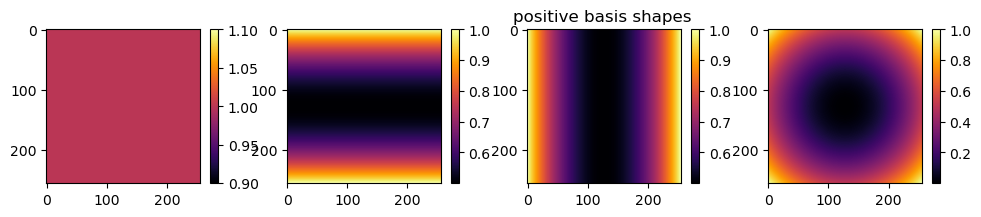

In [ ]:
# Try the polynomial computation
from tfoptym.polynomials import gen_positive_polynomial_basis
basis = gen_positive_polynomial_basis(nterms=3)

plt.figure(figsize=[15,2])
plt.suptitle('positive basis shapes')
for i,func in enumerate(basis):
    plt.subplot(1,len(basis)+1,i+1)
    plt.imshow(func,cmap='inferno')
    plt.colorbar()
plt.subplots_adjust()
plt.show()

In [ ]:
from tfoptym.thinfilms import compute_thin_films_byu
from prysm.thinfilm import multilayer_stack_rt

wvl = .587725
angles = np.arange(1,60,1)
n_C7980 = 1.458461
n_MgF2 = 1.3698
n_CeF3 = 1.6290 + 1j * 0.0034836
n_ZrO2 = 2.1588

stack = [
        (n_MgF2, wvl/4),
        (n_ZrO2, wvl/2),
        (n_CeF3, wvl/4),
        (n_C7980, 10_000),
    ]

rslist,rplist = [],[]
rsplist,rpplist = [],[]
for aoi in angles:
    rs,_ = compute_thin_films_byu(stack,np.radians(aoi),wvl,substrate_index=1,polarization='s')
    rp,_ = compute_thin_films_byu(stack,np.radians(aoi),wvl,substrate_index=1,polarization='p')
    rsp,_ = multilayer_stack_rt(stack,wvl,'s',aoi=aoi)
    rpp,_ = multilayer_stack_rt(stack,wvl,'p',aoi=aoi)
    rslist.append(np.abs(rs)**2)
    rplist.append(np.abs(rp)**2)
    rsplist.append(np.abs(rsp)**2)
    rpplist.append(np.abs(rpp)**2)

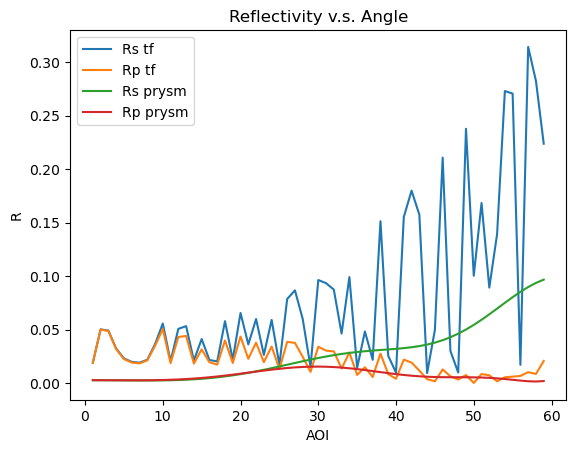

In [ ]:
plt.figure()
plt.plot(angles,rslist,label='Rs tf')
plt.plot(angles,rplist,label='Rp tf')
plt.plot(angles,rsplist,label='Rs prysm')
plt.plot(angles,rpplist,label='Rp prysm')
plt.legend()
plt.title('Reflectivity v.s. Angle')
plt.ylabel('R')
plt.xlabel('AOI')
plt.show()

In [ ]:
rslist

[Array(0.01890709, dtype=float64),
 Array(0.05011008, dtype=float64),
 Array(0.04900398, dtype=float64),
 Array(0.03226677, dtype=float64),
 Array(0.02298606, dtype=float64),
 Array(0.01974496, dtype=float64),
 Array(0.01897004, dtype=float64),
 Array(0.02167734, dtype=float64),
 Array(0.03625615, dtype=float64),
 Array(0.05557622, dtype=float64),
 Array(0.02047906, dtype=float64),
 Array(0.05059098, dtype=float64),
 Array(0.05315309, dtype=float64),
 Array(0.02097353, dtype=float64),
 Array(0.04108825, dtype=float64),
 Array(0.02149651, dtype=float64),
 Array(0.02014519, dtype=float64),
 Array(0.05781186, dtype=float64),
 Array(0.02178763, dtype=float64),
 Array(0.06545887, dtype=float64),
 Array(0.0360858, dtype=float64),
 Array(0.05981889, dtype=float64),
 Array(0.02627341, dtype=float64),
 Array(0.05897578, dtype=float64),
 Array(0.01696085, dtype=float64),
 Array(0.07854996, dtype=float64),
 Array(0.08658966, dtype=float64),
 Array(0.05977239, dtype=float64),
 Array(0.01500815, dt

In [ ]:
ao = 1 + 1j
np.arcsin(ao)

Array(0.66623943+1.06127506j, dtype=complex128, weak_type=True)